# Solving Crimes with Data Science
<br/>
<br/>
<br/>
<br/>
<br/>
<b>Markus Harrer</b>
  
`@feststelltaste`


<small>PyDay 1, 19. Dezember 2019</small>

<img src="resources/innoq_logo.jpg" width=20% height="20%" align="right"/>


## Facts of the case
1. A white mini bus with a red "g" sign on the side window was stolen
1. Police did an innovative mobile phone investigation
1. There is only phone number of unknown identity left

Our approach: Where is the place of residence of the phone number's owner?

## What do we have?

CDRs (Call Data Records) in an Excel file!

That means: Information about the cell towers used for the phone calls!



## Import and Load
Using pandas to read an Excel file into a Dataframe.

In [1]:
import pandas as pd
cdr = pd.read_excel("cdr_data.xlsx")
cdr.head()

Caller      Callee     Event                       Start   TowerID
0  4638472273  2666307251  Incoming  2010-12-25 07:16:24.736813  0db53dd3
1  4638472273  1755442610  Incoming  2010-12-25 21:18:30.053710  aeaf8b43
2  4638472273  5481755331  Incoming  2010-12-25 14:52:42.878016  fadaa83f
3  4638472273  1755442610  Incoming  2010-12-25 16:02:09.001913  fadaa83f
4  4638472273  2145623768  Incoming  2010-12-25 15:28:35.028554  95d7920d

Let's look into the dataset

In [2]:
cdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53185 entries, 0 to 53184
Data columns (total 5 columns):
Caller     53185 non-null int64
Callee     53185 non-null int64
Event      53185 non-null object
Start      53185 non-null object
TowerID    53185 non-null object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


## Data Cleaning
Convert the text in `Start` to a date data type

In [3]:
cdr['Start'] = pd.to_datetime(cdr['Start'])
cdr.head()

Caller      Callee     Event                      Start   TowerID
0  4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  0db53dd3
1  4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  aeaf8b43
2  4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  fadaa83f
3  4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  fadaa83f
4  4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  95d7920d

## Filtering
We know the suspect's phone number (4638472273). We also want to only keep the incoming calls (== `Caller`'s `TowerID`).

In [4]:
suspect = cdr[cdr['Caller'] == 4638472273]
suspect = suspect[suspect['Event'] == 'Incoming']
suspect.head()

Caller      Callee     Event                      Start   TowerID
0  4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  0db53dd3
1  4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  aeaf8b43
2  4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  fadaa83f
3  4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  fadaa83f
4  4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  95d7920d

## But...

Unfortunately: Information about the tower's locations are missing!

We need a second data source from the DARKNET!

## Load another dataset
This time: a CSV (comma separated values) file

In [5]:
towers = pd.read_csv(
    "darknet.io/hacks/infrastructure/mobile_net/texas_towers.csv",
    index_col=0)
towers.head()

TowerLat   TowerLon
TowerID                       
0db53dd3  32.731611 -96.709417
aeaf8b43  32.731722 -96.709500
fadaa83f  32.899944 -96.910389
95d7920d  32.899944 -96.910389
95c91e8b  32.899944 -96.910389

## Data Enrichment
Bringing datasets together by joining them

In [6]:
suspect_loc = suspect.join(towers, on='TowerID')
suspect_loc.head()

Caller      Callee     Event                      Start   TowerID  \
0  4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  0db53dd3   
1  4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  aeaf8b43   
2  4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  fadaa83f   
3  4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  fadaa83f   
4  4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  95d7920d   

    TowerLat   TowerLon  
0  32.731611 -96.709417  
1  32.731722 -96.709500  
2  32.899944 -96.910389  
3  32.899944 -96.910389  
4  32.899944 -96.910389

## Explore the datapoints
Let's take a look at the locations

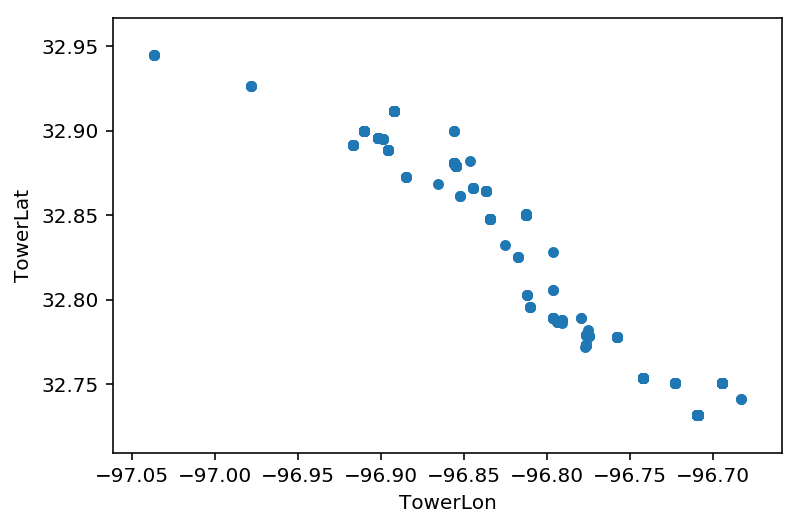

In [7]:
suspect_loc.plot.scatter('TowerLon', "TowerLat");

## Modeling
Make some hypothesis about the suspect's home

#### Hypothesis 1: Home at weekends

In [8]:
suspect_loc['DoW'] = suspect_loc['Start'].dt.weekday_name
suspect_loc.head()

Caller      Callee     Event                      Start   TowerID  \
0  4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  0db53dd3   
1  4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  aeaf8b43   
2  4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  fadaa83f   
3  4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  fadaa83f   
4  4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  95d7920d   

    TowerLat   TowerLon       DoW  
0  32.731611 -96.709417  Saturday  
1  32.731722 -96.709500  Saturday  
2  32.899944 -96.910389  Saturday  
3  32.899944 -96.910389  Saturday  
4  32.899944 -96.910389  Saturday

In [9]:
suspect_on_weekend = suspect_loc[suspect_loc['DoW'].isin(['Saturday', 'Sunday'])].copy()
suspect_on_weekend.head()

Caller      Callee     Event                      Start   TowerID  \
0  4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  0db53dd3   
1  4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  aeaf8b43   
2  4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  fadaa83f   
3  4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  fadaa83f   
4  4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  95d7920d   

    TowerLat   TowerLon       DoW  
0  32.731611 -96.709417  Saturday  
1  32.731722 -96.709500  Saturday  
2  32.899944 -96.910389  Saturday  
3  32.899944 -96.910389  Saturday  
4  32.899944 -96.910389  Saturday

Let's take a look at the weekend's locations

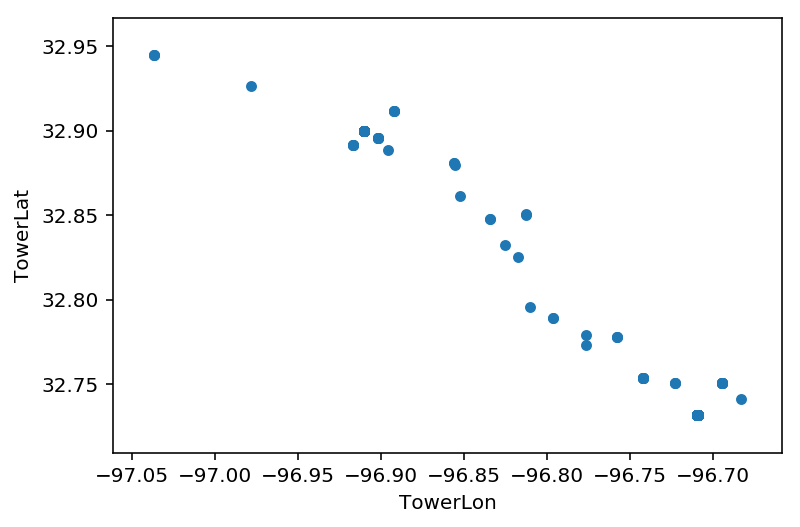

In [10]:
suspect_on_weekend.plot.scatter('TowerLon', "TowerLat");

#### Hypothesis 2: Sleeping at night

In [11]:
suspect_on_weekend['hour'] = suspect_on_weekend['Start'].dt.hour
suspect_on_weekend.head()

Caller      Callee     Event                      Start   TowerID  \
0  4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  0db53dd3   
1  4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  aeaf8b43   
2  4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  fadaa83f   
3  4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  fadaa83f   
4  4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  95d7920d   

    TowerLat   TowerLon       DoW  hour  
0  32.731611 -96.709417  Saturday     7  
1  32.731722 -96.709500  Saturday    21  
2  32.899944 -96.910389  Saturday    14  
3  32.899944 -96.910389  Saturday    16  
4  32.899944 -96.910389  Saturday    15

Keep only the sleeping hours

In [12]:
suspect_on_weekend_nights = suspect_on_weekend[
    (suspect_on_weekend['hour'] < 6)  | (suspect_on_weekend['hour'] > 22)]
suspect_on_weekend_nights.head()

Caller      Callee     Event                      Start   TowerID  \
7468   4638472273  7756914135  Incoming 2011-04-17 05:15:40.205917  cd9f3b1a   
9753   4638472273  7922223441  Incoming 2011-05-21 05:08:20.121145  0db53dd3   
17515  4638472273  2666307251  Incoming 2011-09-11 05:44:15.432523  bcec0121   
31973  4638472273  1755442610  Incoming 2012-04-14 05:42:32.004437  d760c426   
32604  4638472273  7922223441  Incoming 2012-04-22 05:02:55.678110  8ba7e0d7   

        TowerLat   TowerLon       DoW  hour  
7468   32.731722 -96.709500    Sunday     5  
9753   32.731611 -96.709417  Saturday     5  
17515  32.731611 -96.709417    Sunday     5  
31973  32.731611 -96.709417  Saturday     5  
32604  32.731611 -96.709417    Sunday     5

Let's see where the suspect sleeps on weekends

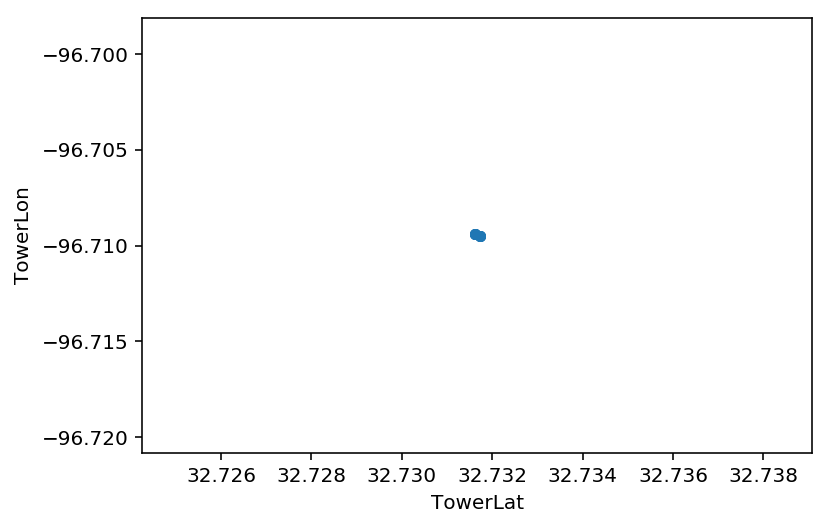

In [13]:
ax = suspect_on_weekend_nights.plot.scatter('TowerLat', 'TowerLon');

#### Clustering
* Cell phones connect to various towers over time
* Therefore: Find the main center of sleeping activities

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 1)
data = suspect_on_weekend_nights[['TowerLat', 'TowerLon']]
kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_
centroids

array([[ 32.7316665, -96.7094585]])

Let's plot the main center of sleeping activity

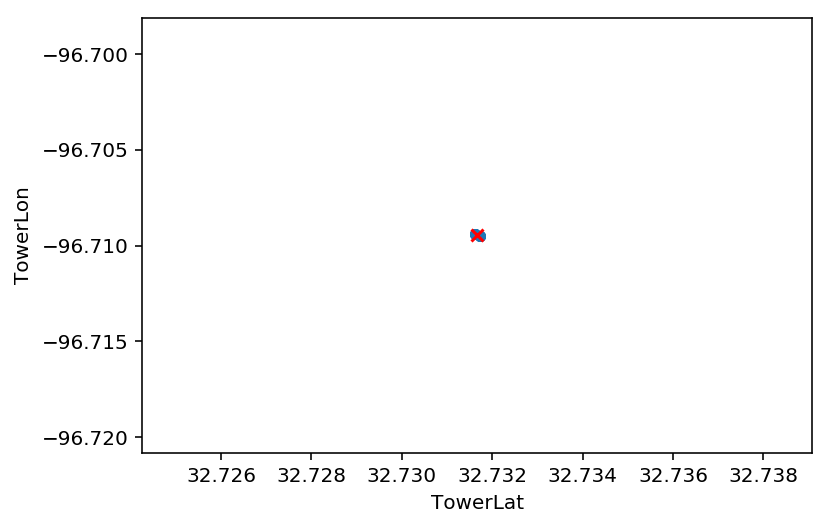

In [15]:
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], c = 'r', marker = 'x').figure

## Results
Let's check the result in Google Maps!

In [16]:
print("https://www.google.com/maps/search/?api=1&query={},{}".format(centroids[0][0], centroids[0][1]))

https://www.google.com/maps/search/?api=1&query=32.7316665,-96.70945850000001


## Discussion: How realistic do you think is this kind of investigation?

<div align="center"><img src="resources/switch_news.png" width="70%" /></div>

<small>https://gonintendo.com/stories/351366-switch-leads-to-break-in-murder-case</small>

## Thanks!

Any questions?

<br/>
  
<b>Contact</b>

Markus Harrer  
  
markus.harrer@innoq.com  
`@feststelltaste`  
https://feststelltaste.de

<img src="resources/innoq_logo.jpg" width=20% height="20%" align="right"/>

## Appendix: Tools used
- Jupyter Notebook
- Python
- pandas
- matplotlib
- scikit-learn

## Appendix: Getting started
My recommendations

1. https://www.feststelltaste.de/top5-jupyter/
1. https://www.feststelltaste.de/top5-python/
1. https://www.feststelltaste.de/top5-pandas/    

## Appendix: Credits

This presentation is based on data and ideas from the online course "Programming with Python for Data Science": https://www.edx.org/course/programming-with-python-for-data-science